In [7]:
#import numpy as np 
import ants
import os
import nibabel as nib 
from tqdm import tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [2]:
bone_non_harm = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/non_harmonized/resampled/resampled_masked_out_BONE"
std_non_harm = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/non_harmonized/resampled/resampled_masked_out_STANDARD"

bone_res_mask = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/lungmasks/inference_resampled_lung_masks/inspiratory_BONE"
std_res_mask = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/lungmasks/inference_resampled_lung_masks/expiratory_STANDARD"

In [48]:
bone_non_harm_files = sorted(os.listdir(bone_non_harm))
std_non_harm_files = sorted(os.listdir(std_non_harm))

bone_res_mask_files = sorted(os.listdir(bone_res_mask))
std_res_mask_files = sorted(os.listdir(std_res_mask))

bone_non_harm_file = os.path.join(bone_non_harm, bone_non_harm_files[32])
std_non_harm_file = os.path.join(std_non_harm, std_non_harm_files[32])

bone_res_mask_file = os.path.join(bone_res_mask, bone_res_mask_files[32])
std_res_mask_file = os.path.join(std_res_mask, std_res_mask_files[32])


In [49]:
bone_non_harm_img = ants.image_read(bone_non_harm_file)
std_non_harm_img = ants.image_read(std_non_harm_file)

bone_res_mask_img = ants.image_read(bone_res_mask_file)
std_res_mask_img = ants.image_read(std_res_mask_file)

In [50]:
reg_exp_to_insp = ants.registration(fixed = bone_non_harm_img, moving = std_non_harm_img, type_of_transform = 'SyN', mask= bone_res_mask_img, moving_mask = std_res_mask_img)
warped_img_exp_to_insp = ants.apply_transforms(fixed = bone_non_harm_img, moving = std_non_harm_img, transformlist = reg_exp_to_insp['fwdtransforms'])
warped_img_insp_to_exp = ants.apply_transforms(fixed = std_non_harm_img, moving = bone_non_harm_img, transformlist = reg_exp_to_insp['invtransforms'])

#plot the image

Text(0.5, 1.0, 'Insp to exp warped')

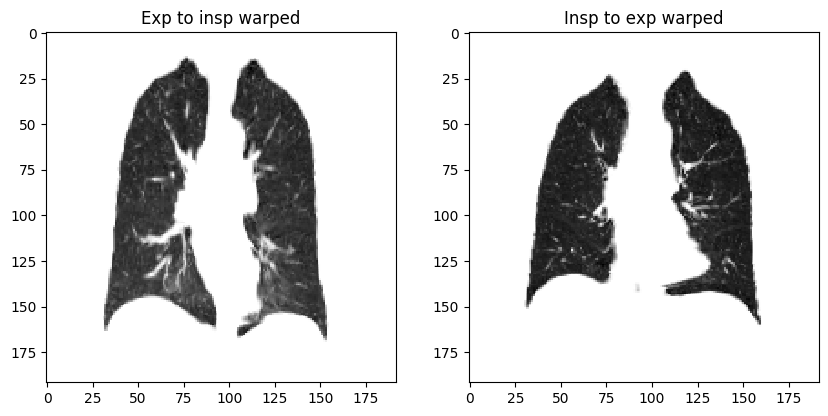

In [52]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(np.rot90(warped_img_exp_to_insp.numpy()[:,100,:]), cmap='gray')
plt.title('Exp to insp warped')
plt.subplot(2,2,2)
plt.imshow(np.rot90(warped_img_insp_to_exp.numpy()[:,100,:]), cmap='gray')
plt.title('Insp to exp warped')

In [57]:
jacobian = ants.create_jacobian_determinant_image(bone_non_harm_img,reg_exp_to_insp['fwdtransforms'][0])
jacobian_reverse = ants.create_jacobian_determinant_image(std_non_harm_img, reg_exp_to_insp['invtransforms'][1])

In [58]:
reg_exp_to_insp

{'warpedmovout': ANTsImage (RPI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (192, 192, 192)
 	 Spacing    : (2.1146, 2.1146, 1.3932)
 	 Origin     : (-210.3, 196.5072, -253.75)
 	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.],
 'warpedfixout': ANTsImage (RPI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (192, 192, 192)
 	 Spacing    : (1.9271, 1.9271, 1.3509)
 	 Origin     : (-196.4, 175.4772, -248.25)
 	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.],
 'fwdtransforms': ['/tmp/tmppqv5ec1w1Warp.nii.gz',
  '/tmp/tmppqv5ec1w0GenericAffine.mat'],
 'invtransforms': ['/tmp/tmppqv5ec1w0GenericAffine.mat',
  '/tmp/tmppqv5ec1w1InverseWarp.nii.gz']}

In [61]:
in_path = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_data/harmonized/resampled"
mask_path = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/lungmasks/resampled_harmonized_BONE_lung_masks"

#rename files in mask_path with the name of files in in_path
in_files = sorted(os.listdir(in_path))
mask_files = sorted(os.listdir(mask_path))

#Use os.rename to rename the files
for i in range(len(in_files)):
    os.rename(os.path.join(mask_path, mask_files[i]), os.path.join(mask_path, in_files[i]))

In [62]:
#Clip the images
bone_non_harm = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_original_resolution/data/images/masked_out_BONE"
bone_non_harm_out = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_original_resolution/data/images/clipped_masked_out_BONE"
for file in tqdm(os.listdir(bone_non_harm)):
    img = nib.load(os.path.join(bone_non_harm, file))
    img_data = img.get_fdata()
    img_data = np.clip(img_data, -1024, 0)

    img_clipped = nib.Nifti1Image(img_data, img.affine, img.header)
    nib.save(img_clipped, os.path.join(bone_non_harm_out, file))



 72%|███████▏  | 36/50 [05:02<01:47,  7.70s/it]

In [ ]:
std_non_harm = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_original_resolution/data/images/original_BONE_harmonized"
std_non_harm_out = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_original_resolution/data/images/clipped_masked_out_harmonized"
for file in tqdm(os.listdir(std_non_harm)):
    img = nib.load(os.path.join(std_non_harm, file))
    img_data = img.get_fdata()
    img_data = np.clip(img_data, -1024, 0)

    img_clipped = nib.Nifti1Image(img_data, img.affine, img.header)
    nib.save(img_clipped, os.path.join(std_non_harm_out, file))